# Captura de datos

In [5]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/hjmesa/Dengue/master/init.py
from init import init; init(force_download=False)

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


# Captura y desnormalizacion de los datos (si esta es requerida)

In [13]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

#Para regresión lineal
from sklearn import datasets, linear_model

#Para separación de datos en conjuntos de test y entrenamiento
from sklearn.model_selection import train_test_split

#Para regresion polinomial
from sklearn.preprocessing import PolynomialFeatures



# -----------------------------------------------------------------------------
# CAPTURA DE DATOS
# -----------------------------------------------------------------------------    

# Cargar el archivo de datos historicos

#Datos desnormalizados listos para el proceso
#FILE1 = 'local/data/DATOS_MENSUALES/DATOS_MENSUALES_ESTACIONES_NINO.csv'

#Datos historicos normalizados, requieren denormalizacion para transformarlo en los datso 
FILE1 = 'local/data/DATOS_MENSUALES/DATOS_MENSUALES_NORMALIZADOS_CALI.csv'
FILE2 = 'local/data/DATOS_MENSUALES/PROMEDIOS_MENSUALES.CSV'
FILE3 = 'local/data/DATOS_MENSUALES/DESV_ESTA_MENSUALES.CSV'


#Carga del archivo de datos sin normalizar
#dataset = read_csv(FILE1, header=0, index_col=False)

#Carga de los archivos cuando estan normalizados
dataset = read_csv(FILE1, header=0, index_col=False)
media = read_csv(FILE2, header=0, index_col=False)
d_estd = read_csv(FILE3, header=0, index_col=False)

#my_column = dataset.pop("Confirmados")
#dataset.insert(14, my_column.name, my_column)

#Eliminar datos no requeridos
#dataset = dataset.drop(["Todos"], axis=1)

#Capturar los datos normalizados o desnormalizados en una matriz
Datos = dataset.values

#Captura de los parametros de desnormalizacion
v_media = media.values
v_d_estd = d_estd.values

#Creacion de la matriz desnormalizada
Datos_dn = np.zeros((len(Datos), len(Datos[0])))
for i in range (0,len(Datos)):
    Datos_dn[i,0]=Datos[i,0]
    Datos_dn[i,1]=Datos[i,1]
    for j in range (2, len(Datos[0])):
        Datos_dn[i,j]=Datos[i,j]*v_d_estd[int(Datos[i,1]-1),j-1]+v_media[int(Datos[i,1])-1,j-1]
        


Nombres = ['Año','Mes','Precipitación','Humedad relativa media','Humedad relativa máxima','Humedad relativa mínima',
           'Temperatura media','Temperatura máxima','Temperatura mínima','Temperatura Niño 1+2','Anomalia Niño 1+2',
           'Temperatura Niño 3','Anomalia Niño 3','Temperatura Niño 4','Anomalia  Niño 4','Temperatura Niño 3+4',
           'Anomalia Niño 3+4','Casos confirmados por laboratorio','Todos los casos']


#Número de datos
L=len(Datos)

# ---- Regresión lineal simple con datos normalizados

=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




****************************Precipitación*****************************




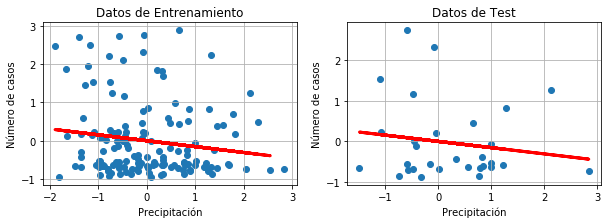

Precisión del modelo: R =  0.02314962042091051



************************Humedad relativa media************************




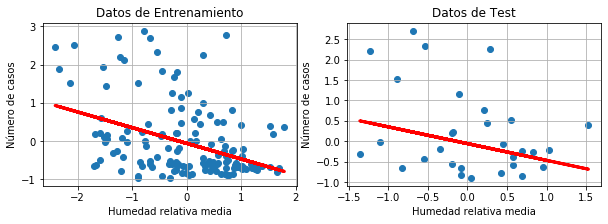

Precisión del modelo: R =  0.19877301088181099



***********************Humedad relativa máxima************************




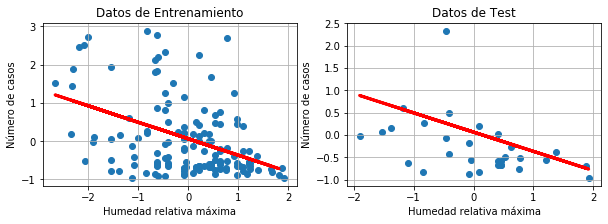

Precisión del modelo: R =  0.1676951602127389



***********************Humedad relativa mínima************************




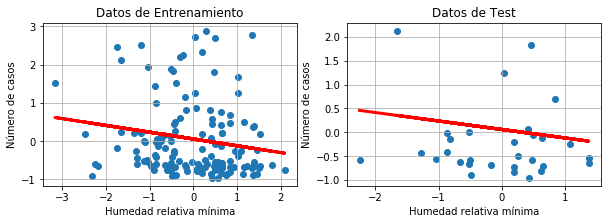

Precisión del modelo: R =  0.030431123573881114



**************************Temperatura media***************************




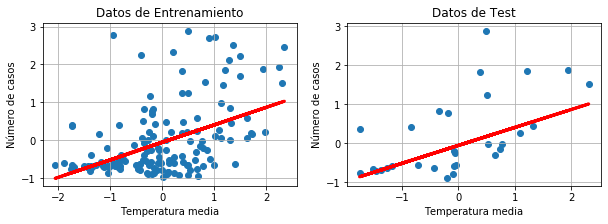

Precisión del modelo: R =  0.2071065266445622



**************************Temperatura máxima**************************




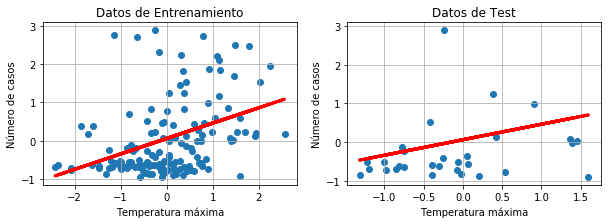

Precisión del modelo: R =  0.1624277530872605



**************************Temperatura mínima**************************




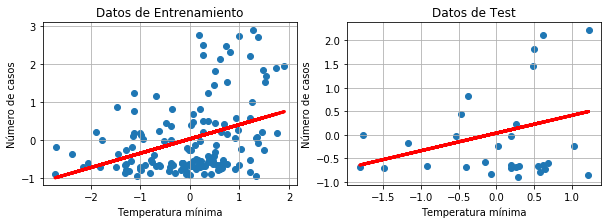

Precisión del modelo: R =  0.1488466645712211



*************************Temperatura niño 1+2*************************




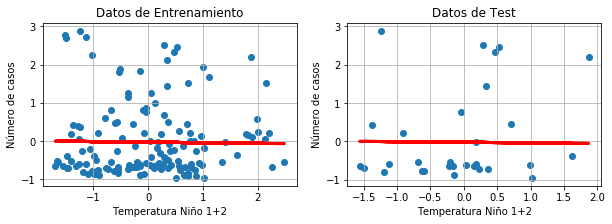

Precisión del modelo: R =  0.0002934622388519603



**************************Anomalia niño 1+2***************************




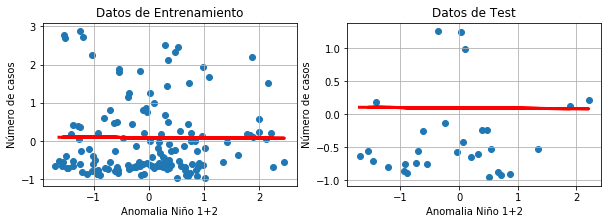

Precisión del modelo: R =  3.099151497198971e-05



**************************Temperatura niño 3**************************




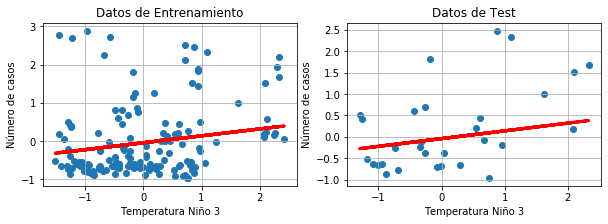

Precisión del modelo: R =  0.03160618481366717



***************************Anomalia niño 3****************************




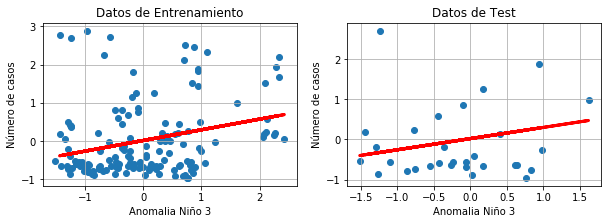

Precisión del modelo: R =  0.07974019226880047



**************************Temperatura niño 4**************************




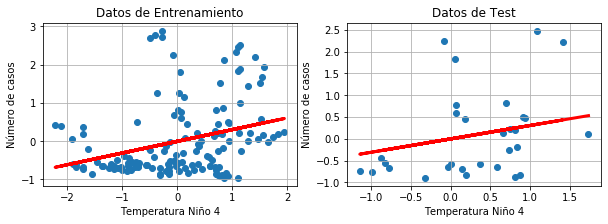

Precisión del modelo: R =  0.10307252986722337



***************************Anomalia  niño 4***************************




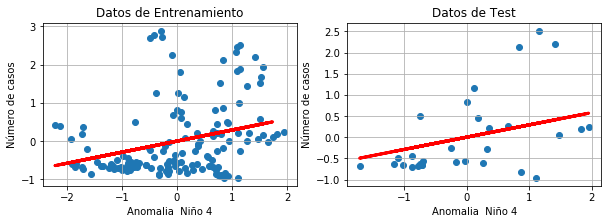

Precisión del modelo: R =  0.08218945684570668



*************************Temperatura niño 3+4*************************




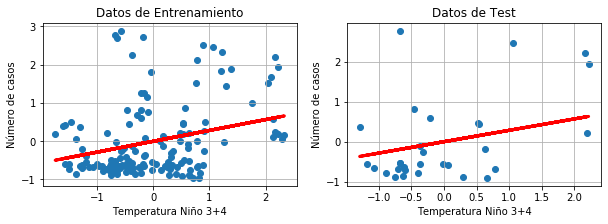

Precisión del modelo: R =  0.08558527470219379



**************************Anomalia niño 3+4***************************




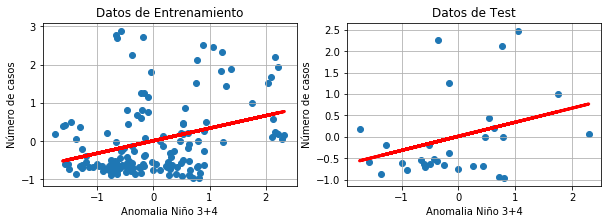

Precisión del modelo: R =  0.10901838888879989





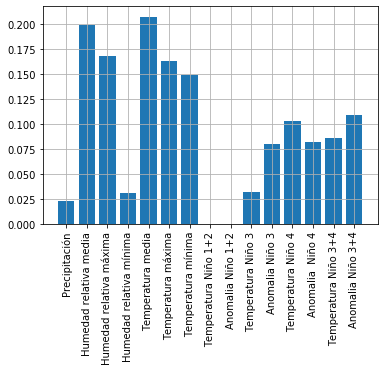

In [8]:
#Precision en la regresion lineal simple con datos normalizados

#Arreglo para almacenar la correlacion simple de cada variable normalizada
P_R_L_S_N = np.zeros(15)

#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_N[i-2]=lr.score(X_train, y_train)
    print('Precisión del modelo: R = ',P_R_L_S_N[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_L_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()



# ---- Regresión lineal simple con datos desnormalizados

=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




****************************Precipitación*****************************




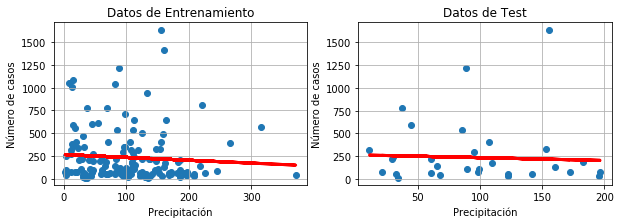

Precisión del modelo: R =  0.006308074298167821



************************Humedad relativa media************************




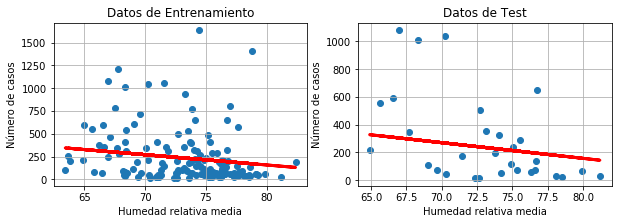

Precisión del modelo: R =  0.023909135579563534



***********************Humedad relativa máxima************************




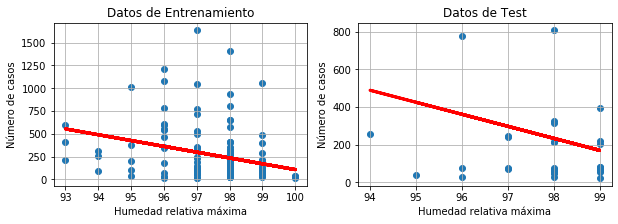

Precisión del modelo: R =  0.08743048740065162



***********************Humedad relativa mínima************************




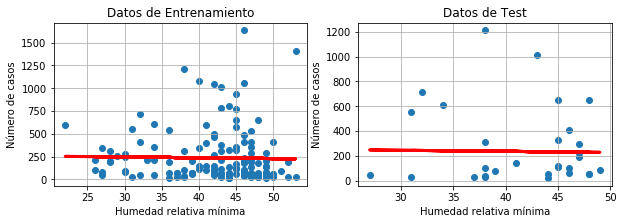

Precisión del modelo: R =  0.00042318909074734457



**************************Temperatura media***************************




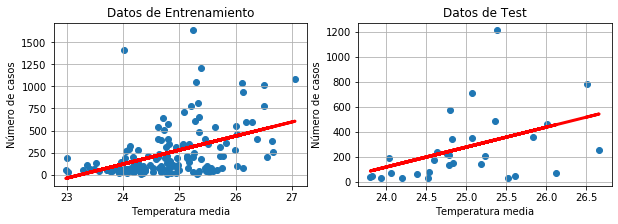

Precisión del modelo: R =  0.1971633792593791



**************************Temperatura máxima**************************




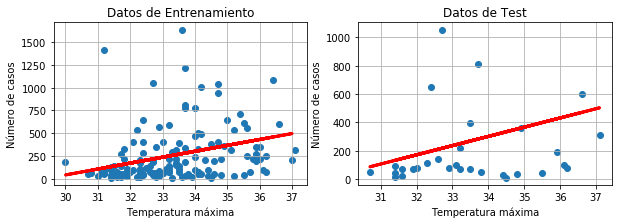

Precisión del modelo: R =  0.09578128633414995



**************************Temperatura mínima**************************




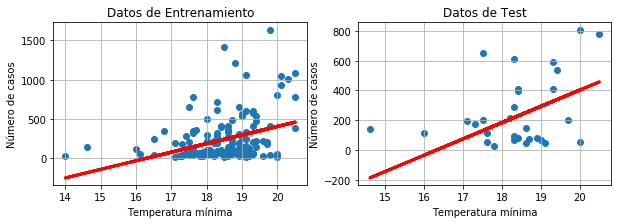

Precisión del modelo: R =  0.1100677663159686



*************************Temperatura niño 1+2*************************




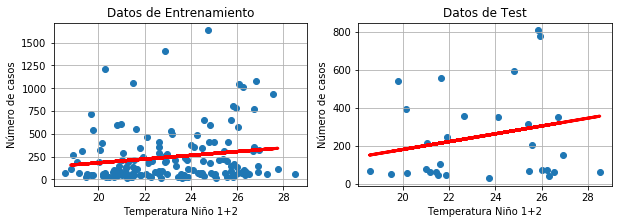

Precisión del modelo: R =  0.023102327321900318



**************************Anomalia niño 1+2***************************




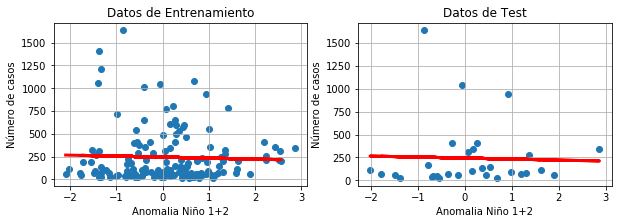

Precisión del modelo: R =  0.0015722990920735702



**************************Temperatura niño 3**************************




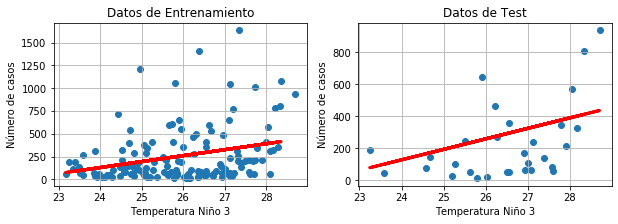

Precisión del modelo: R =  0.07580772133387703



***************************Anomalia niño 3****************************




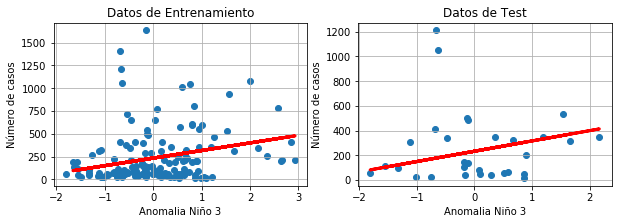

Precisión del modelo: R =  0.07204651737383605



**************************Temperatura niño 4**************************




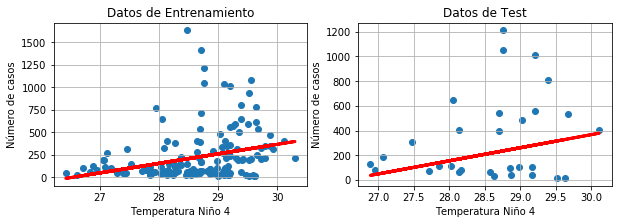

Precisión del modelo: R =  0.0966241369429871



***************************Anomalia  niño 4***************************




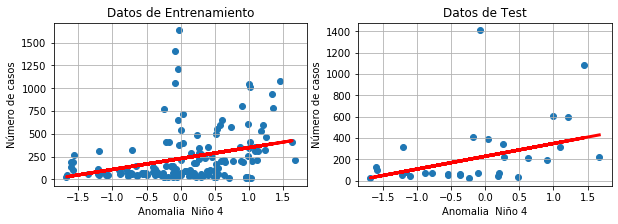

Precisión del modelo: R =  0.08836035988793056



*************************Temperatura niño 3+4*************************




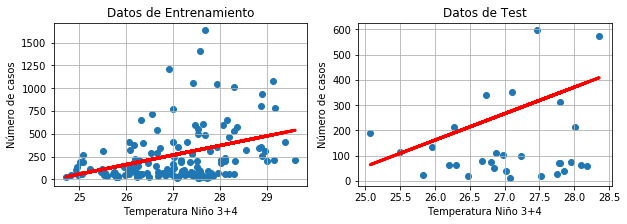

Precisión del modelo: R =  0.14194662101739552



**************************Anomalia niño 3+4***************************




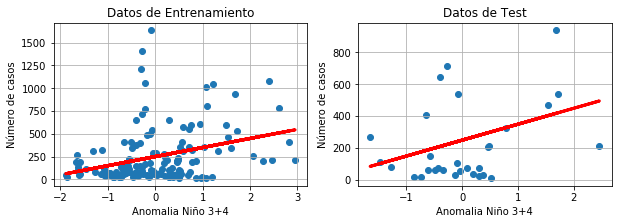

Precisión del modelo: R =  0.09966828663427107





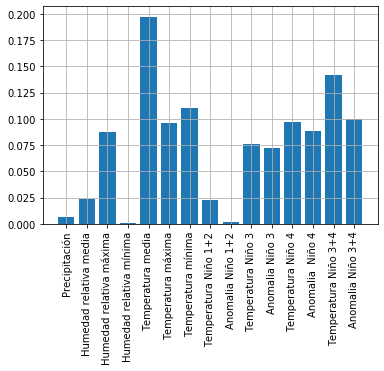

In [9]:
#Precision en la regresion lineal simple con datos desnormalizados

#Arreglo para almacenar la correlacion simple de cada variable desnormalizada
P_R_L_S_DN = np.zeros(15)


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos_dn[0])-2]

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_DN[i-2]=lr.score(X_train, y_train)
    print('Precisión del modelo: R = ',P_R_L_S_DN[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_L_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()




# ---- Regresión lineal Múltiple con datos normalizados

In [10]:
#Precision en la regresion lineal multiple con datos normalizados


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos[:, 3]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos[:, 4]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura media
X1 = Datos[:, 6]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura máxima
X1 = Datos[:, 7]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos[:, 12:17]
X1 = np.reshape(X1, (L,5))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)


P_R_L_M_N = lr_multiple.score(X_train, y_train)
print('Precisión del modelo:')
print(P_R_L_M_N)

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
0.3170747021617548


# ---- Regresión lineal Múltiple con datos desnormalizados

In [11]:
#Precision en la regresion lineal multiple con datos normalizados


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos_dn[:, 3]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos_dn[:, 4]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura media
X1 = Datos_dn[:, 6]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura máxima
X1 = Datos_dn[:, 7]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos_dn[:, 12:17]
X1 = np.reshape(X1, (L,5))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)


P_R_L_M_DN = lr_multiple.score(X_train, y_train)
print('Precisión del modelo:')
print(P_R_L_M_DN)

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




Precisión del modelo:
0.3542414855736232


# ---- Regresión polinomial simple con datos normalizados

=                                    REGRESION POLINOMIAL SIMPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




****************************Precipitación*****************************




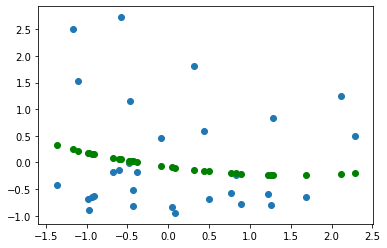

Precisión del modelo:
Precisión del modelo: R =  0.006723077394876542



************************Humedad relativa media************************




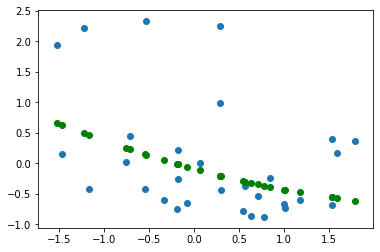

Precisión del modelo:
Precisión del modelo: R =  0.14137116882980794



***********************Humedad relativa máxima************************




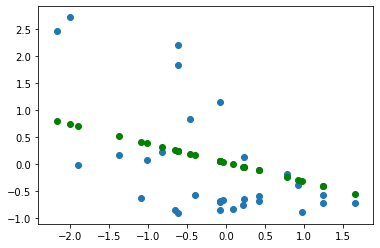

Precisión del modelo:
Precisión del modelo: R =  0.2524658952155664



***********************Humedad relativa mínima************************




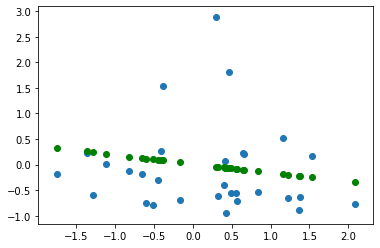

Precisión del modelo:
Precisión del modelo: R =  -0.016671028123536713



**************************Temperatura media***************************




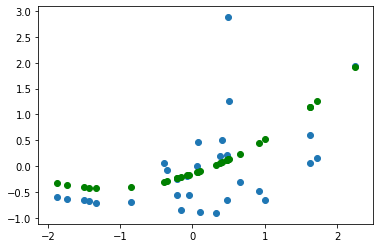

Precisión del modelo:
Precisión del modelo: R =  0.16004085197100948



**************************Temperatura máxima**************************




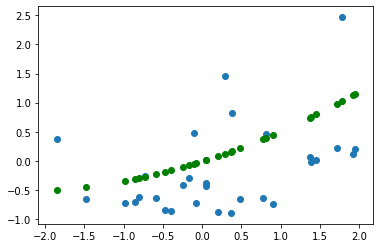

Precisión del modelo:
Precisión del modelo: R =  -0.03233889640703991



**************************Temperatura mínima**************************




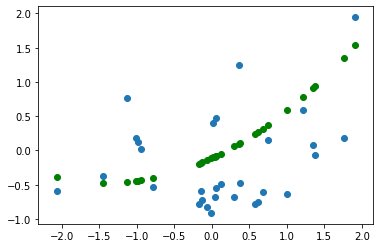

Precisión del modelo:
Precisión del modelo: R =  -0.17355126806044785



*************************Temperatura niño 1+2*************************




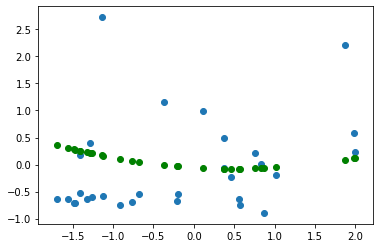

Precisión del modelo:
Precisión del modelo: R =  -0.08411287139480139



**************************Anomalia niño 1+2***************************




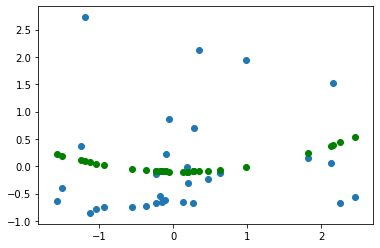

Precisión del modelo:
Precisión del modelo: R =  -0.02986977979808425



**************************Temperatura niño 3**************************




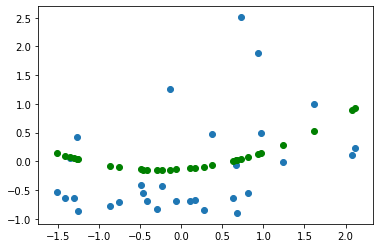

Precisión del modelo:
Precisión del modelo: R =  0.027936461569028292



***************************Anomalia niño 3****************************




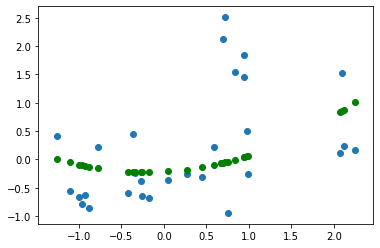

Precisión del modelo:
Precisión del modelo: R =  0.02572939434651189



**************************Temperatura niño 4**************************




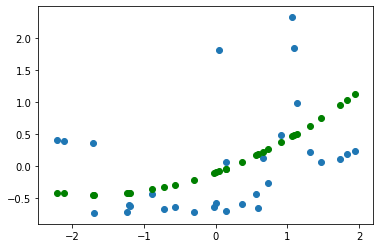

Precisión del modelo:
Precisión del modelo: R =  0.10497611088916668



***************************Anomalia  niño 4***************************




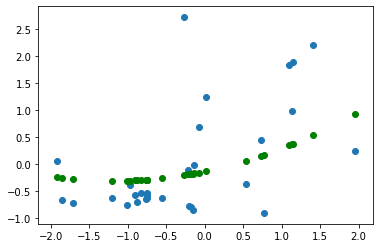

Precisión del modelo:
Precisión del modelo: R =  0.22477990598727993



*************************Temperatura niño 3+4*************************




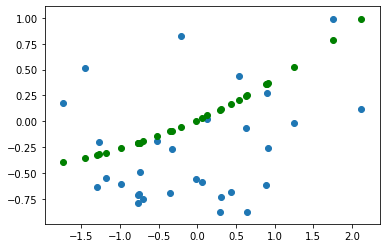

Precisión del modelo:
Precisión del modelo: R =  -0.412708647271691



**************************Anomalia niño 3+4***************************




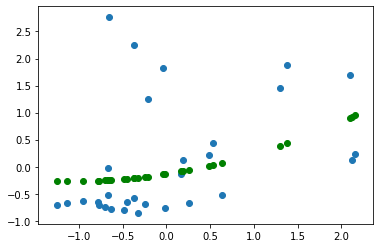

Precisión del modelo:
Precisión del modelo: R =  0.10370898375432902





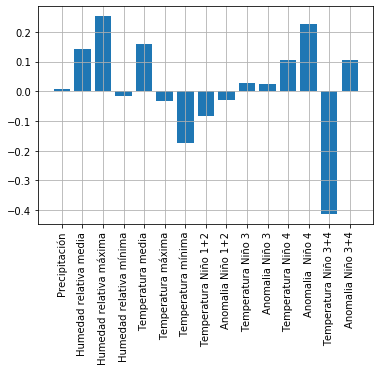

In [20]:
#Precision en la regresion polinomial simple con datos normalizados
P_R_POLI_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                    REGRESION POLINOMIAL SIMPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


#Se define el grado del polinomio 
poli_reg = PolynomialFeatures(degree = 2)


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    
    
    ########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########


    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Defino el algoritmo a utilizar
    pr = linear_model.LinearRegression()

    #Entreno el modelo
    pr.fit(X_train_poli, y_train)

    #Realizo una predicción
    Y_pred_pr = pr.predict(X_test_poli)
    
    
    #Graficamos los datos junto con el modelo
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, Y_pred_pr, c="g")
    plt.show()
    
    P_R_POLI_S_N[i-2]=pr.score(X_test_poli, y_test)

    print('Precisión del modelo:')
    print('Precisión del modelo: R = ',P_R_POLI_S_N[i-2])
    print('\n\n') 

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_POLI_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


# ---- Regresión polinomial simple con datos desnormalizados

=                                    REGRESION POLINOMIAL SIMPLE                                   =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




****************************Precipitación*****************************




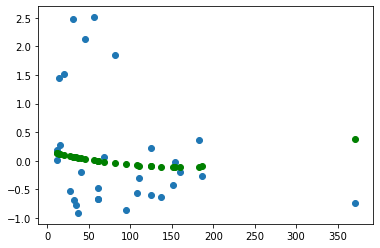

Precisión del modelo:
Precisión del modelo: R =  0.0



************************Humedad relativa media************************




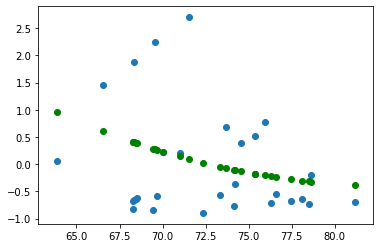

Precisión del modelo:
Precisión del modelo: R =  0.0



***********************Humedad relativa máxima************************




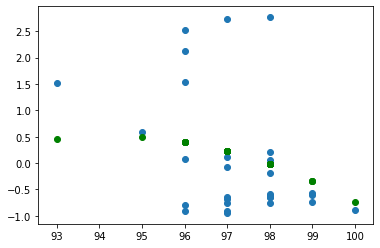

Precisión del modelo:
Precisión del modelo: R =  0.0



***********************Humedad relativa mínima************************




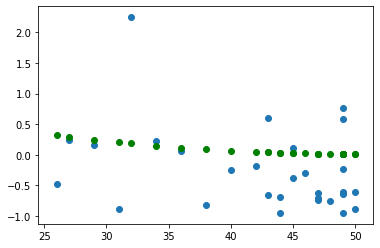

Precisión del modelo:
Precisión del modelo: R =  0.0



**************************Temperatura media***************************




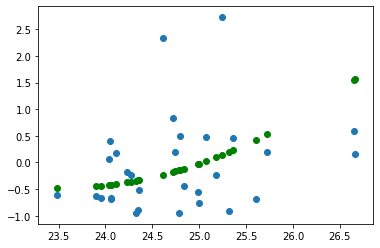

Precisión del modelo:
Precisión del modelo: R =  0.0



**************************Temperatura máxima**************************




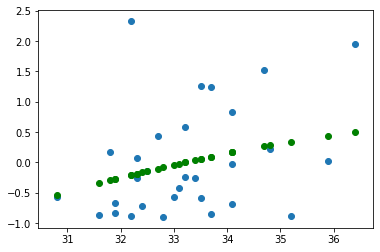

Precisión del modelo:
Precisión del modelo: R =  0.0



**************************Temperatura mínima**************************




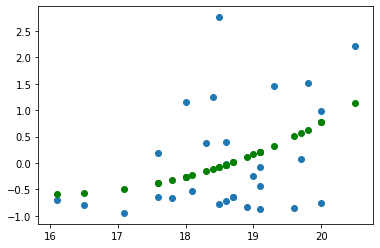

Precisión del modelo:
Precisión del modelo: R =  0.0



*************************Temperatura niño 1+2*************************




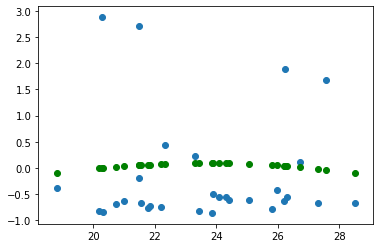

Precisión del modelo:
Precisión del modelo: R =  0.0



**************************Anomalia niño 1+2***************************




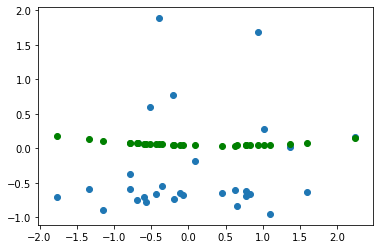

Precisión del modelo:
Precisión del modelo: R =  0.0



**************************Temperatura niño 3**************************




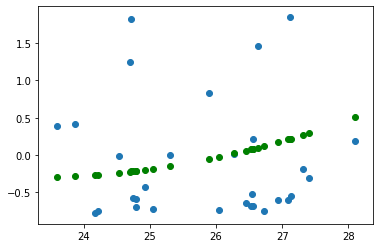

Precisión del modelo:
Precisión del modelo: R =  0.0



***************************Anomalia niño 3****************************




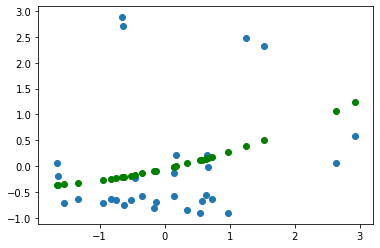

Precisión del modelo:
Precisión del modelo: R =  0.0



**************************Temperatura niño 4**************************




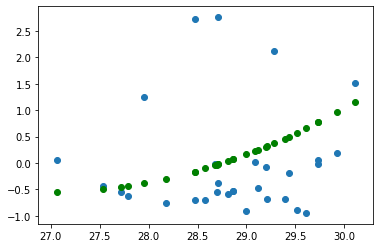

Precisión del modelo:
Precisión del modelo: R =  0.0



***************************Anomalia  niño 4***************************




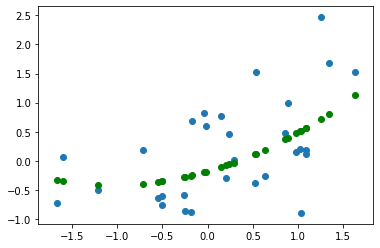

Precisión del modelo:
Precisión del modelo: R =  0.0



*************************Temperatura niño 3+4*************************




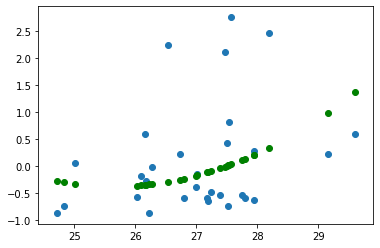

Precisión del modelo:
Precisión del modelo: R =  0.0



**************************Anomalia niño 3+4***************************




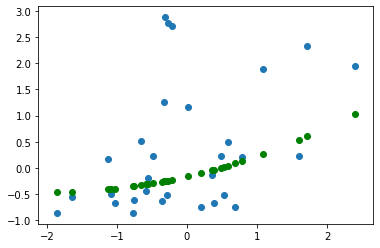

Precisión del modelo:
Precisión del modelo: R =  0.0





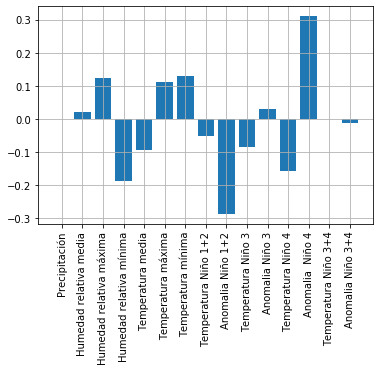

In [19]:
#Precision en la regresion polinomial simple con datos normalizados
P_R_POLI_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                    REGRESION POLINOMIAL SIMPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


#Se define el grado del polinomio 
poli_reg = PolynomialFeatures(degree = 2)


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    
    
    ########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########


    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Defino el algoritmo a utilizar
    pr = linear_model.LinearRegression()

    #Entreno el modelo
    pr.fit(X_train_poli, y_train)

    #Realizo una predicción
    Y_pred_pr = pr.predict(X_test_poli)
    
    
    #Graficamos los datos junto con el modelo
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, Y_pred_pr, c="g")
    plt.show()
    
    P_R_POLI_DN[i-2]=pr.score(X_test_poli, y_test)

    print('Precisión del modelo:')
    print('Precisión del modelo: R = ',P_R_POLI_S_DN[i-2])
    print('\n\n') 

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_POLI_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()



# ---- Regresión polinomial Múltiple con datos normalizados (grado 2)¶

In [25]:
#Precision en la regresion lineal multiple con datos normalizados

P_R_POLI_M_N = 0

cadena = ""
print (cadena.center(100, "="))
cadena = "                                  REGRESION POLINOMIAL MULTIPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos[:, 3]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos[:, 4]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura media
X1 = Datos[:, 6]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# Temperatura máxima
X1 = Datos[:, 7]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# ?????????????????????
X1 = Datos[:, 8]
X1 = np.reshape(X1, (L,1))

X = np.append(X, X1, axis=1)

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos[:, 12:17]
X1 = np.reshape(X1, (L,5))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()

P_R_POLI_M_N = pr.score(X_test_poli, y_test)

print('Precisión del modelo:')
print(P_R_POLI_M_N)

=                                  REGRESION POLINOMIAL MULTIPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
-1.1221181068166306


# ---- Regresión polinomial simple con datos desnormalizados (grado 2)

=                                   REGRESION POLINOMIAL MULTIPLE                                  =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




****************************Precipitación*****************************




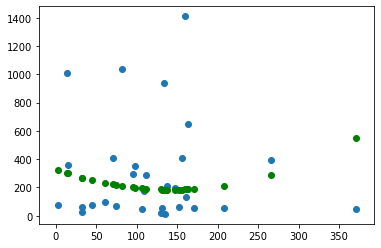

Precisión del modelo:
Precisión del modelo: R =  -0.12783959126616762



************************Humedad relativa media************************




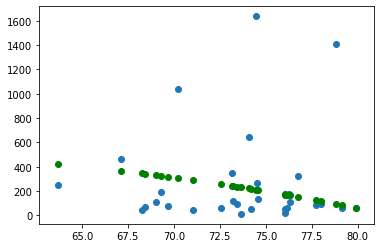

Precisión del modelo:
Precisión del modelo: R =  -0.08079686240773776



***********************Humedad relativa máxima************************




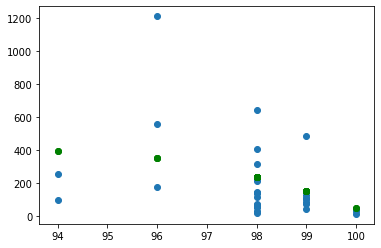

Precisión del modelo:
Precisión del modelo: R =  0.14809703355724302



***********************Humedad relativa mínima************************




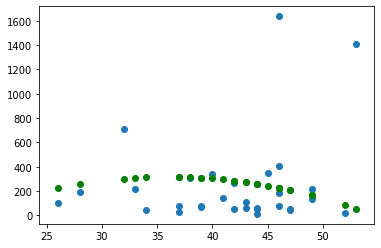

Precisión del modelo:
Precisión del modelo: R =  -0.1480561113810297



**************************Temperatura media***************************




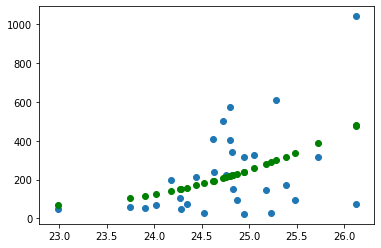

Precisión del modelo:
Precisión del modelo: R =  0.1952480487333852



**************************Temperatura máxima**************************




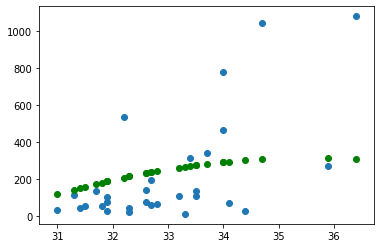

Precisión del modelo:
Precisión del modelo: R =  0.15577684097898714



**************************Temperatura mínima**************************




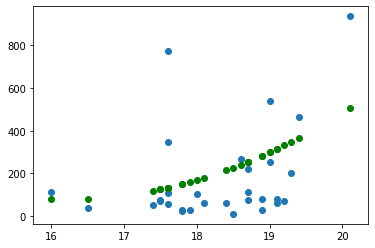

Precisión del modelo:
Precisión del modelo: R =  0.16629176245371258



*************************Temperatura niño 1+2*************************




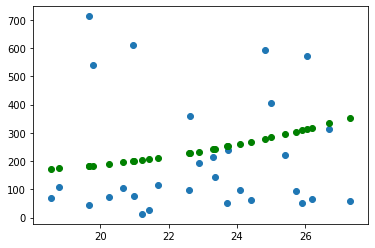

Precisión del modelo:
Precisión del modelo: R =  -0.0911110393687451



**************************Anomalia niño 1+2***************************




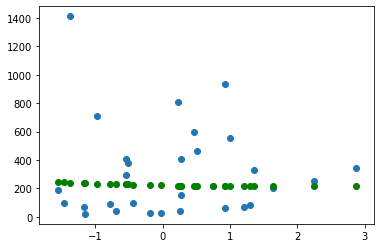

Precisión del modelo:
Precisión del modelo: R =  -0.0758402267881848



**************************Temperatura niño 3**************************




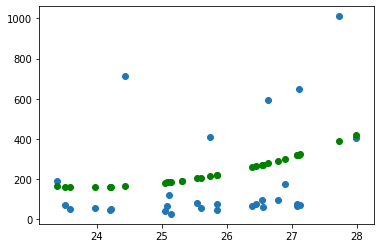

Precisión del modelo:
Precisión del modelo: R =  0.122724036144504



***************************Anomalia niño 3****************************




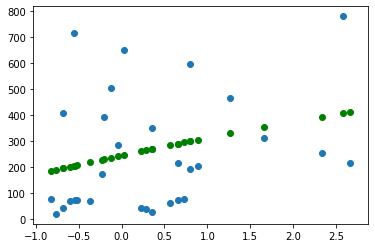

Precisión del modelo:
Precisión del modelo: R =  0.06850969488233394



**************************Temperatura niño 4**************************




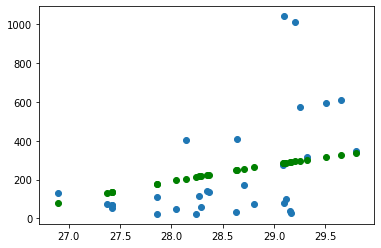

Precisión del modelo:
Precisión del modelo: R =  0.17847289801967037



***************************Anomalia  niño 4***************************




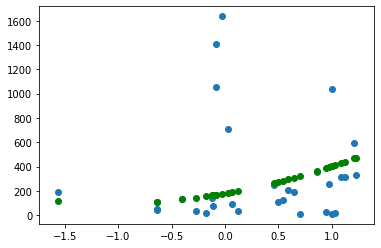

Precisión del modelo:
Precisión del modelo: R =  -0.11873422695943314



*************************Temperatura niño 3+4*************************




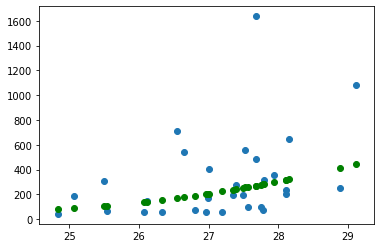

Precisión del modelo:
Precisión del modelo: R =  0.06124456993089922



**************************Anomalia niño 3+4***************************




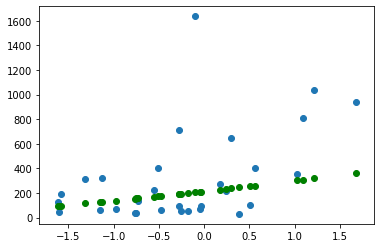

Precisión del modelo:
Precisión del modelo: R =  0.03987005423686707





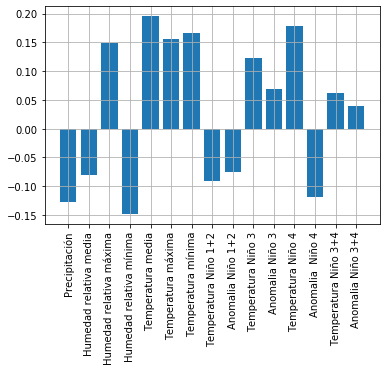

In [26]:
#Precision en la regresion polinomial simple con datos normalizados
P_R_POLI_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                   REGRESION POLINOMIAL MULTIPLE                                  "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos_dn[:, len(Datos[0])-2]


#Se define el grado del polinomio 
poli_reg = PolynomialFeatures(degree = 2)


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    
    
    ########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########



    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Defino el algoritmo a utilizar
    pr = linear_model.LinearRegression()

    #Entreno el modelo
    pr.fit(X_train_poli, y_train)

    #Realizo una predicción
    Y_pred_pr = pr.predict(X_test_poli)
    
    
    #Graficamos los datos junto con el modelo
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, Y_pred_pr, c="g")
    plt.show()
    
    P_R_POLI_S_DN[i-2]=pr.score(X_test_poli, y_test)

    print('Precisión del modelo:')
    print('Precisión del modelo: R = ',P_R_POLI_S_DN[i-2])
    print('\n\n') 

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_POLI_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()



# Regresón Polinomial Múltiple con datos desnormalizados (grado 2)
# Sin ajuste hasta aca¶

In [86]:
#Precision en la regresion lineal multiple con datos normalizados

cadena = ""
print (cadena.center(100, "="))
cadena = "                                  REGRESION POLINOMIAL MULTIPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

# Capturar y estructurar las variables independientes del modelo
# Humedad relativa media
X = Datos_dn[:, 8]
X = np.reshape(X, (L,1))
# Humedad relativa máxima
X1 = Datos_dn[:, 11]
X1 = np.reshape(X1, (L,1))

# 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
X1 = Datos_dn[:, 14:17]
X1 = np.reshape(X1, (L,3))

X = np.append(X, X1, axis=1)

#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos[0])-2]



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()


print('Precisión del modelo:')
print(pr.score(X_test_poli, y_test))

=                                  REGRESION POLINOMIAL MULTIPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
-0.2729149874472212


# Regresión SVM con datos normalizados

=                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




*************************Precipitación media**************************




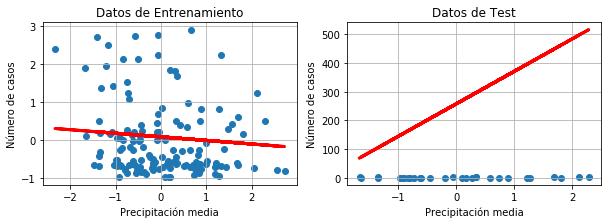

Precisión del modelo: R =  -0.0329615475956464



************************Humedad relativa media************************




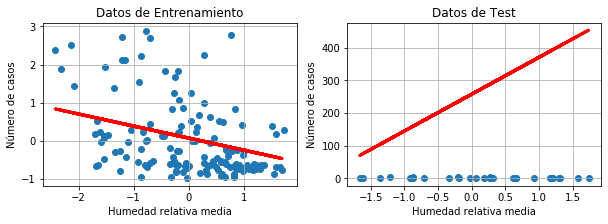

Precisión del modelo: R =  0.14663843592207237



***********************Humedad relativa máxima************************




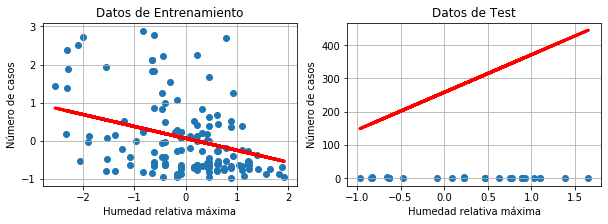

Precisión del modelo: R =  0.09925132332183718



***********************Humedad relativa mínima************************




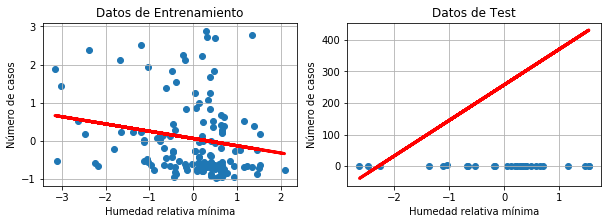

Precisión del modelo: R =  0.028898840990887686



**************************Temperatura media***************************




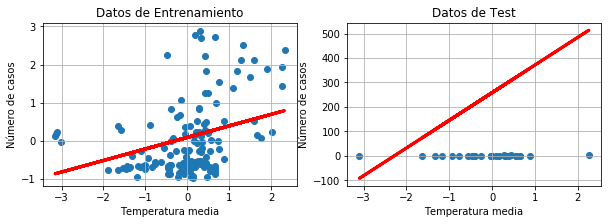

Precisión del modelo: R =  -0.11464327395170137



**************************Temperatura máxima**************************




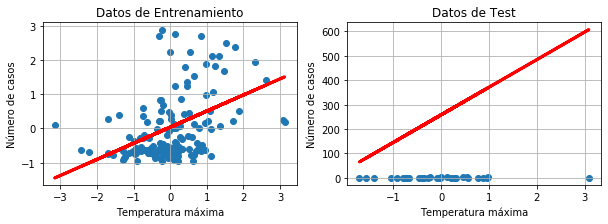

Precisión del modelo: R =  -0.0668382993144725



**************************Temperatura mínima**************************




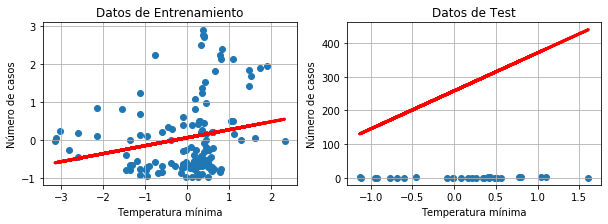

Precisión del modelo: R =  0.032922869819795975



*******************************Nino1+2********************************




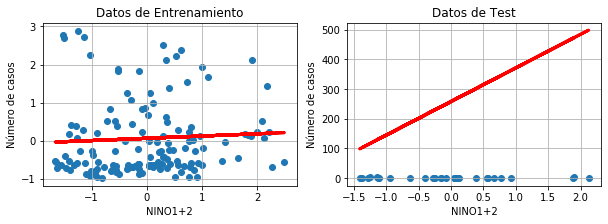

Precisión del modelo: R =  -0.010788966319208448



*********************************Anom*********************************




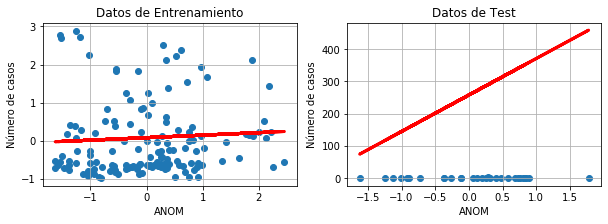

Precisión del modelo: R =  -0.10936097714390747



********************************Nino3*********************************




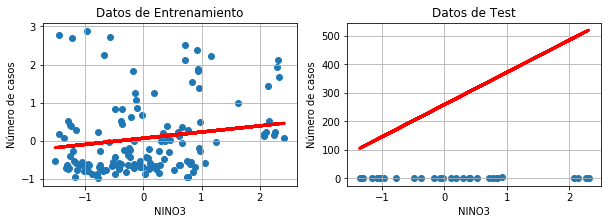

Precisión del modelo: R =  0.15440096826076433



********************************Anom.1********************************




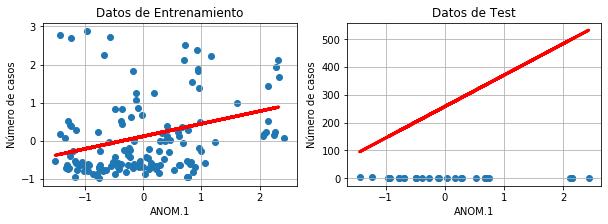

Precisión del modelo: R =  -0.08473084721713153



********************************Nino4*********************************




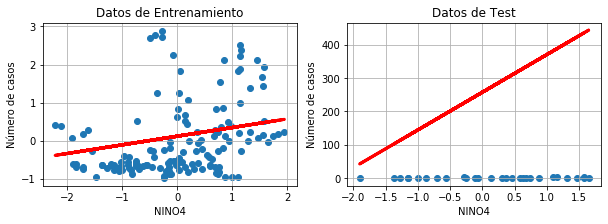

Precisión del modelo: R =  0.15856494216119554



********************************Anom.2********************************




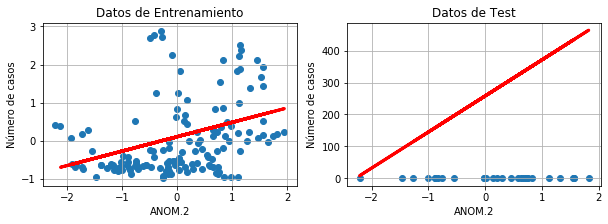

Precisión del modelo: R =  -0.011762843845163129



*******************************Nino3.4********************************




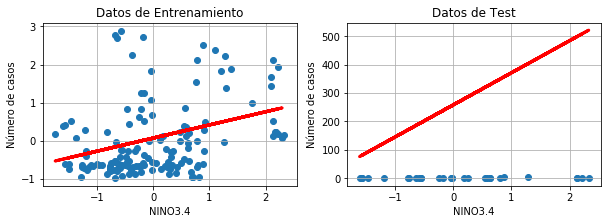

Precisión del modelo: R =  0.14363902182914867



********************************Anom.3********************************




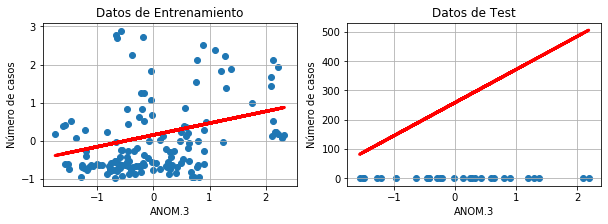

Precisión del modelo: R =  0.1931310776441173





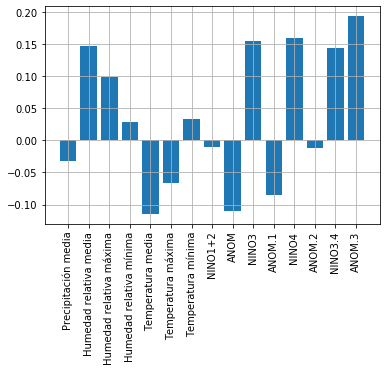

'\n\n\n\n\n'

In [87]:
#Precision en la regresion lineal simple con datos normalizados
P_R_SVM_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]

#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.8)

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Entreno el modelo
    svr.fit(X_train, y_train)

    #Realizo una predicción
    Y_pred = svr.predict(X_train)
    

    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_SVM_S_N[i-2]=svr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_SVM_S_N[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_SVM_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


"""




"""


# Regresión SVM con datos Desnormalizados

=                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           =
=                                                                                                  =
=                             DATOS MENSUALES DESNORMALIZADOS - CALI                               =




*************************Precipitación media**************************




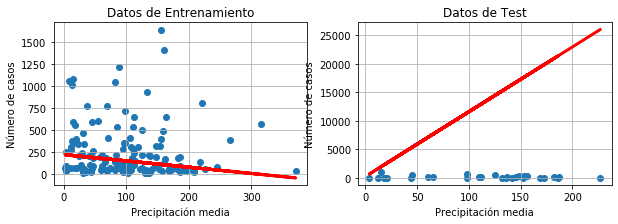

Precisión del modelo: R =  -0.022229048953161804



************************Humedad relativa media************************




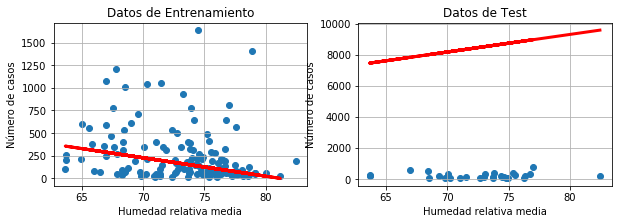

Precisión del modelo: R =  -0.26416819903075006



***********************Humedad relativa máxima************************




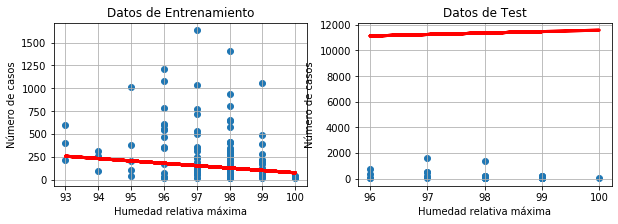

Precisión del modelo: R =  -0.06847662578511327



***********************Humedad relativa mínima************************




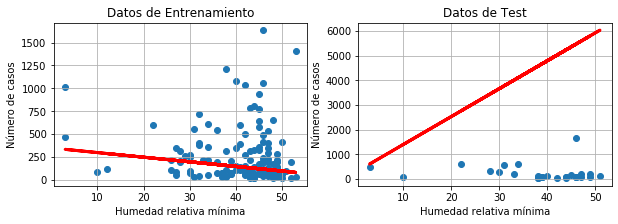

Precisión del modelo: R =  -0.013363638758433494



**************************Temperatura media***************************




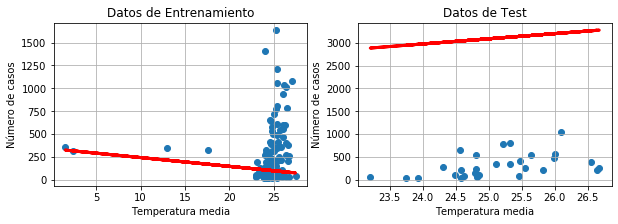

Precisión del modelo: R =  -0.7582239622644642



**************************Temperatura máxima**************************




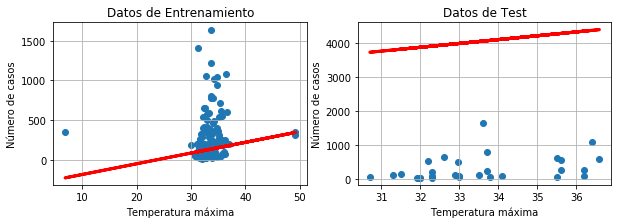

Precisión del modelo: R =  -0.1850235994120213



**************************Temperatura mínima**************************




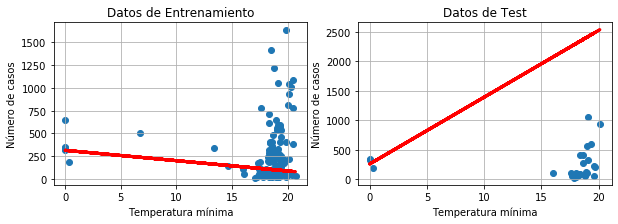

Precisión del modelo: R =  -0.27620563347012284



*******************************Nino1+2********************************




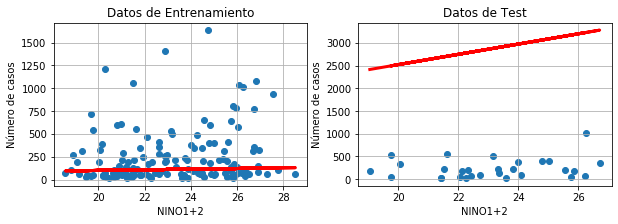

Precisión del modelo: R =  -0.3095260771973938



*********************************Anom*********************************




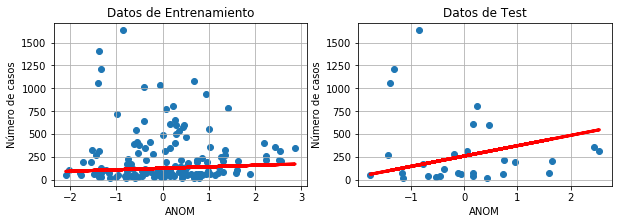

Precisión del modelo: R =  -0.23996698111261083



********************************Nino3*********************************




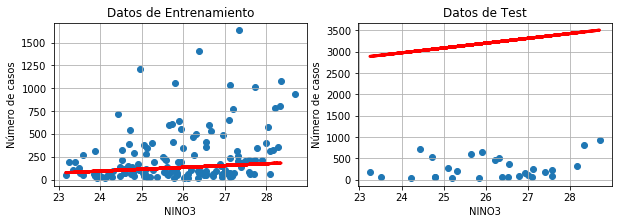

Precisión del modelo: R =  -0.28165739948090485



********************************Anom.1********************************




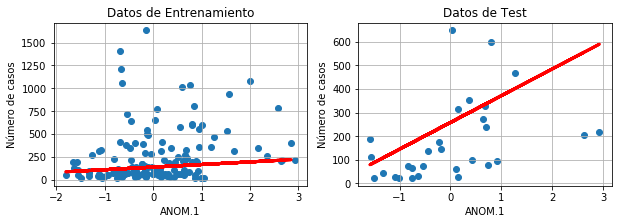

Precisión del modelo: R =  0.06669559617455378



********************************Nino4*********************************




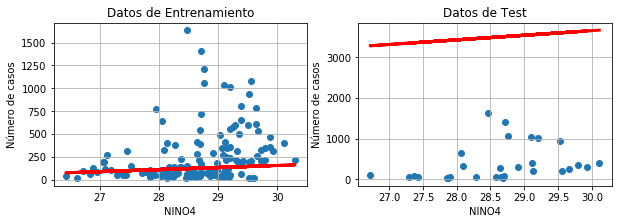

Precisión del modelo: R =  -0.3589574970891469



********************************Anom.2********************************




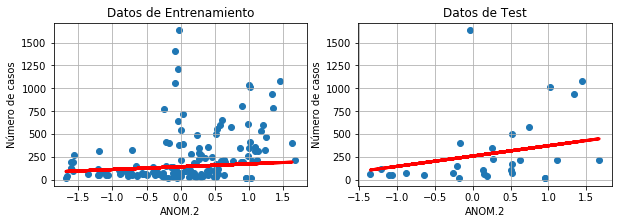

Precisión del modelo: R =  -0.10254452816285364



*******************************Nino3.4********************************




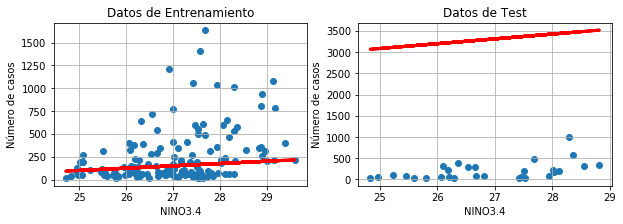

Precisión del modelo: R =  0.043434838398316855



********************************Anom.3********************************




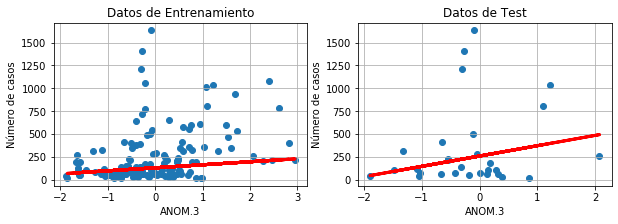

Precisión del modelo: R =  -0.2083627477714336





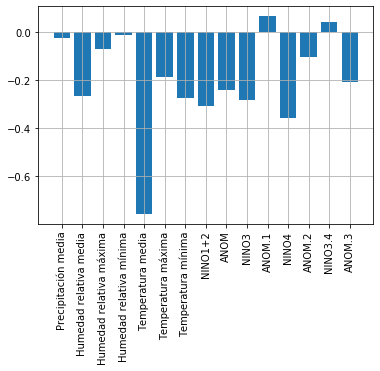

'\n\n\n\n\n'

In [88]:
#Precision en la regresion lineal simple con datos desnormalizados
P_R_SVM_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                             DATOS MENSUALES DESNORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos_dn[:, len(Datos[0])-2]

#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.8)

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Entreno el modelo
    svr.fit(X_train, y_train)

    #Realizo una predicción
    Y_pred = svr.predict(X_train)
    

    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_SVM_S_DN[i-2]=svr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_SVM_S_DN[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_SVM_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


"""




"""
